In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.datasets import cifar10
from keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [9]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
1250/1250 [==============================] - 8s 5ms/step - loss: 1.8353 - accuracy: 0.3680 - val_loss: 1.6111 - val_accuracy: 0.4312
Epoch 2/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.4343 - accuracy: 0.4888 - val_loss: 1.3131 - val_accuracy: 0.5237
Epoch 3/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3160 - accuracy: 0.5308 - val_loss: 1.2033 - val_accuracy: 0.5651
Epoch 4/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2377 - accuracy: 0.5623 - val_loss: 1.1765 - val_accuracy: 0.5771
Epoch 5/30
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1757 - accuracy: 0.5843 - val_loss: 1.2911 - val_accuracy: 0.5339
Epoch 6/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1348 - accuracy: 0.6031 - val_loss: 1.1858 - val_accuracy: 0.5872
Epoch 7/30
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1028 - accuracy: 0.6132 - val_loss: 1.2090 - val_accuracy:

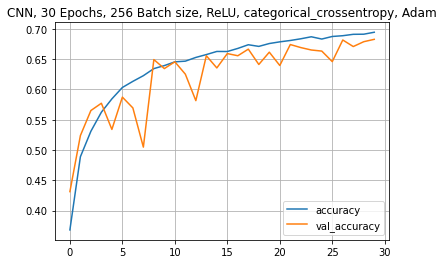

In [15]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.grid()
plt.title('CNN, 30 Epochs, 256 Batch size, ReLU, categorical_crossentropy, Adam')
plt.show()